# PROJECT: Pet Classification Tensorflow Model Using CNN

# Project Objective
To build a CNN model that classifies the given pet images correctly into dog and cat images.

The project scope document specifies the requirements for the project “Pet Classification Model Using CNN.” Apart from specifying the functional and nonfunctional requirements for the project, it also serves as an input for project scoping.

# Project Description and Scope
We are provided with the following resources that can be used as inputs for your model:

A collection of images of pets, that is​, ​cats and dogs. These images are of different sizes with varied lighting conditions.
Code template containing the following code blocks: a. Import modules (part 1) b. Set hyper parameters (part 2) c. Read image data set (part 3) d. Run TensorFlow model (part 4) You are expected to write the code for CNN image classification model (between Parts 3 and 4) using TensorFlow that trains on the data and calculates the accuracy score on the test data.

# Project Guidelines
Begin by extracting ipynb file and the data in the same folder. The CNN model (cnn_model_fn) should have the following layers: 
● Input layer 
● Convolutional layer 1 with 32 filters of kernel size[5,5] 
● Pooling layer 1 with pool size**[2,2] and stride 2 
● Convolutional layer 2 with 64 filters of kernel size[5,5] 
● Pooling layer 2 with pool size[2,2] and stride 2
● Dense layer whose output size is fixed in the hyper parameter: fc_size=32 
● Dropout layer with dropout probability 0.4
Predict the class by doing a softmax on the output of the dropout lay bold text

This should be followed by training and evaluation: For the training step, define the loss function and minimize it 
● For the evaluation step, calculate the accuracy Run the program for 100, 200, and 300 iterations, respectively. 
Follow this by a report on the final accuracy and loss on the evaluation data. Prerequisites To execute this project, refer to the installation guide in the downloads section of LMS.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/Users/awadh/Data Science/cnn-practice-master/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:/Users/awadh/Data Science/cnn-practice-master/data\test\cats\101.jpg
C:/Users/awadh/Data Science/cnn-practice-master/data\test\cats\102.jpg
C:/Users/awadh/Data Science/cnn-practice-master/data\test\cats\103.jpg
C:/Users/awadh/Data Science/cnn-practice-master/data\test\cats\104.jpg
C:/Users/awadh/Data Science/cnn-practice-master/data\test\cats\105.jpg
C:/Users/awadh/Data Science/cnn-practice-master/data\test\cats\106.jpg
C:/Users/awadh/Data Science/cnn-practice-master/data\test\cats\107.jpg
C:/Users/awadh/Data Science/cnn-practice-master/data\test\cats\108.jpg
C:/Users/awadh/Data Science/cnn-practice-master/data\test\cats\109.jpg
C:/Users/awadh/Data Science/cnn-practice-master/data\test\cats\110.jpg
C:/Users/awadh/Data Science/cnn-practice-master/data\test\dogs\101.jpg
C:/Users/awadh/Data Science/cnn-practice-master/data\test\dogs\102.jpg
C:/Users/awadh/Data Science/cnn-practice-master/data\test\dogs\103.jpg
C:/Users/awadh/Data Science/cnn-practice-master/data\test\dogs\104.jpg
C:/Use

In [2]:
# for numerical things
import numpy as np

# opencv & matplotlib to deal with images
import cv2
import matplotlib.pyplot as plt

# os for file system related tasks
import os

# random to fix seeds
import random
import tensorflow as tf
import torch
from sklearn import metrics

# import keras to build CNN model
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model


In [3]:
def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    tf.random.set_seed(seed)

# We fix all the random seed so that, we can reproduce the results.
seed_everything(2020)

In [4]:
# images shape
fc_size=32
IMAGE_SHAPE = 128

input_layer = Input(shape=(IMAGE_SHAPE, IMAGE_SHAPE, 3))

convolution_layer_1 = Conv2D(32, kernel_size=(5,5), activation = 'relu')(input_layer)
max_pool_1 = MaxPooling2D(pool_size=(2,2), strides=2)(convolution_layer_1)

convolution_layer_2 = Conv2D(64, kernel_size=(5,5), activation = 'relu')(max_pool_1)
max_pool_2 = MaxPooling2D(pool_size=(2,2),strides=2)(convolution_layer_2)


dense_layer_1 = Dense(fc_size, activation='relu')(max_pool_2)
flatten_layer_1 = Flatten()(dense_layer_1)
dropout_1 = Dropout(0.4)(flatten_layer_1)





output_layer = Dense(1, activation='sigmoid')(dropout_1)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 64)       0         
 2D)                                                             
                                                                 
 dense (Dense)               (None, 29, 29, 32)        2080  

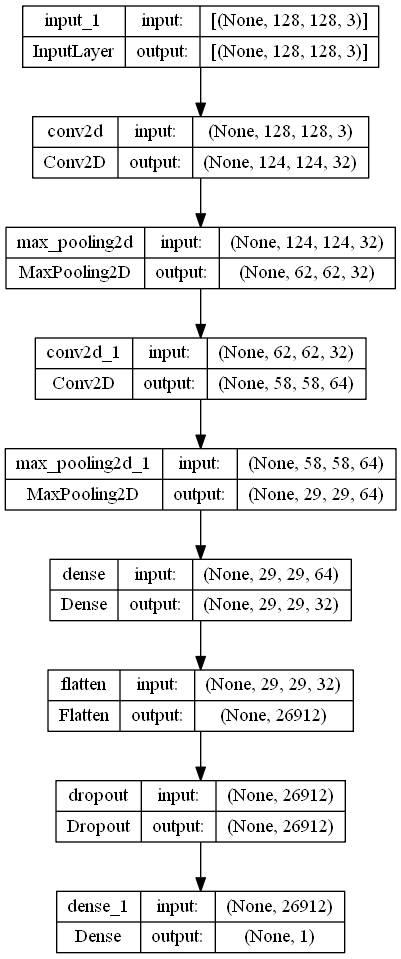

In [5]:
plot_model(model, show_shapes=True)

In [6]:
train_data_generator = ImageDataGenerator(
    # We divide each pixel value(0, 255) with 255 to make them in range [0, 1]
    rescale = 1./255, 
    
    # We randomly shear & zoom our image while training to make our training robust
    shear_range = 0.2, 
    zoom_range = 0.2, 
    
    # We also flip our images by 180 degree horizontally to make our training robust
    horizontal_flip = True
)

test_data_generator = ImageDataGenerator(
    rescale = 1./255
)

In [7]:
training_set_data = train_data_generator.flow_from_directory(
    "C:/Users/awadh/Data Science/cnn-practice-master/data/train", 
    target_size = (IMAGE_SHAPE, IMAGE_SHAPE), 
    batch_size = 64,
    class_mode = 'binary'
)

test_set_data = test_data_generator.flow_from_directory(
    'C:/Users/awadh/Data Science/cnn-practice-master/data/test',
    target_size = (IMAGE_SHAPE, IMAGE_SHAPE),
    batch_size = 64, 
    class_mode = 'binary'
)

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [8]:
 #Evaluating the Model Performance
def model_loss():
    plt.plot(History.history['loss'])
    plt.plot(History.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['train', 'test'])
    plt.show()
    
def model_accuracy():
    plt.plot(History.history['accuracy'])
    plt.plot(History.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['train', 'test'])
    plt.show()

In [9]:
History = model.fit(
    training_set_data, 
    epochs = 100, 
    validation_data = test_set_data, 
)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.6887 - accuracy: 0.5250 - val_loss: 0.7141 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 1s 727ms/step - loss: 0.7094 - accuracy: 0.5000 - val_loss: 0.6987 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 1s 734ms/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 1s 750ms/step - loss: 0.6961 - accuracy: 0.5000 - val_loss: 0.6924 - val_accuracy: 0.4500
Epoch 5/100
1/1 [==============================] - 1s 716ms/step - loss: 0.6726 - accuracy: 0.6750 - val_loss: 0.6993 - val_accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 1s 684ms/step - loss: 0.6873 - accuracy: 0.4750 - val_loss: 0.7038 - val_accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 1s 685ms/step - loss: 0.6795 - accuracy: 0.5750 - val_loss: 0.7165 - val_accuracy: 0.4500
Epoch 8/100
1/1 

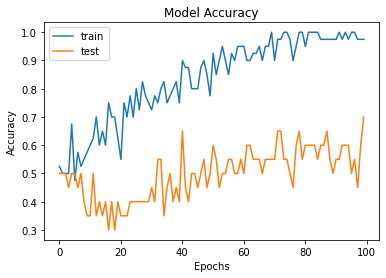

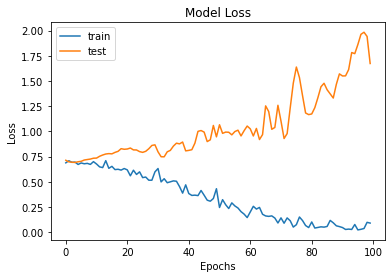

In [10]:
model_accuracy()
print()

model_loss()

1/1 [==============================] - 0s 94ms/step
Model : It's a DOG


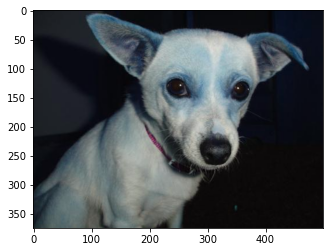

In [11]:
TEST_PATH = "C:/Users/awadh/Data Science/cnn-practice-master/data/test"
test_dogs_images = os.listdir(TEST_PATH + os.sep+ "dogs/")

test_dog_img = test_dogs_images[3]
test_dog_img = cv2.imread(TEST_PATH + os.sep+ "dogs/" + test_dog_img)

plt.figure()
plt.imshow(test_dog_img)

test_dog_img = cv2.resize(test_dog_img / 255, (IMAGE_SHAPE, IMAGE_SHAPE))
test_dog_img = test_dog_img.reshape(1, IMAGE_SHAPE, IMAGE_SHAPE, 3)

prediction = model.predict(test_dog_img)

if prediction[0][0] <= 0.5:
    print("Model : It's a CAT")
else:
    print("Model : It's a DOG")
    
    


1/1 [==============================] - 0s 16ms/step
Model : It's a DOG


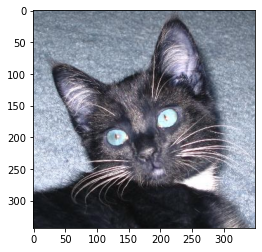

In [12]:
TEST_PATH = "C:/Users/awadh/Data Science/cnn-practice-master/data/test"
test_dogs_images = os.listdir(TEST_PATH + os.sep+ "cats/")

test_dog_img = test_dogs_images[1]
test_dog_img = cv2.imread(TEST_PATH + os.sep+ "cats/" + test_dog_img)

plt.figure()
plt.imshow(test_dog_img)

test_dog_img = cv2.resize(test_dog_img / 255, (IMAGE_SHAPE, IMAGE_SHAPE))
test_dog_img = test_dog_img.reshape(1, IMAGE_SHAPE, IMAGE_SHAPE, 3)

prediction = model.predict(test_dog_img)

if prediction[0][0] <= 0.5:
    print("Model : It's a CAT")
else:
    print("Model : It's a DOG")

In [13]:
History = model.fit(
    training_set_data, 
    epochs = 200, 
    validation_data = test_set_data, 
)

Epoch 1/200
1/1 [==============================] - 1s 717ms/step - loss: 0.0259 - accuracy: 1.0000 - val_loss: 1.5316 - val_accuracy: 0.6000
Epoch 2/200
1/1 [==============================] - 1s 654ms/step - loss: 0.0188 - accuracy: 1.0000 - val_loss: 1.4672 - val_accuracy: 0.5500
Epoch 3/200
1/1 [==============================] - 1s 662ms/step - loss: 0.1248 - accuracy: 0.9500 - val_loss: 1.5969 - val_accuracy: 0.6000
Epoch 4/200
1/1 [==============================] - 1s 670ms/step - loss: 0.0273 - accuracy: 1.0000 - val_loss: 1.8635 - val_accuracy: 0.6000
Epoch 5/200
1/1 [==============================] - 1s 668ms/step - loss: 0.0376 - accuracy: 1.0000 - val_loss: 2.0911 - val_accuracy: 0.5500
Epoch 6/200
1/1 [==============================] - 1s 666ms/step - loss: 0.0757 - accuracy: 0.9500 - val_loss: 2.1154 - val_accuracy: 0.5500
Epoch 7/200
1/1 [==============================] - 1s 683ms/step - loss: 0.0365 - accuracy: 1.0000 - val_loss: 2.1966 - val_accuracy: 0.5000
Epoch 8/200
1

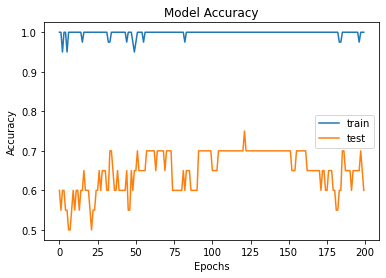

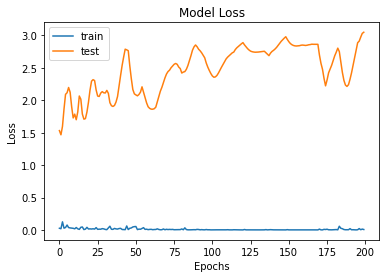

In [14]:
model_accuracy()
print()

model_loss()

1/1 [==============================] - 0s 16ms/step
Model : It's a DOG


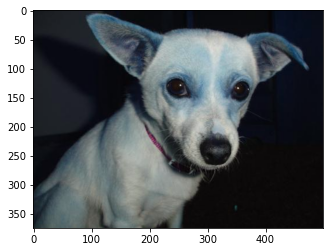

In [15]:
TEST_PATH = "C:/Users/awadh/Data Science/cnn-practice-master/data/test"
test_dogs_images = os.listdir(TEST_PATH + os.sep+ "dogs/")

test_dog_img = test_dogs_images[3]
test_dog_img = cv2.imread(TEST_PATH + os.sep+ "dogs/" + test_dog_img)

plt.figure()
plt.imshow(test_dog_img)

test_dog_img = cv2.resize(test_dog_img / 255, (IMAGE_SHAPE, IMAGE_SHAPE))
test_dog_img = test_dog_img.reshape(1, IMAGE_SHAPE, IMAGE_SHAPE, 3)

prediction = model.predict(test_dog_img)

if prediction[0][0] <= 0.5:
    print("Model : It's a CAT")
else:
    print("Model : It's a DOG")
    
    


1/1 [==============================] - 0s 16ms/step
Model : It's a DOG


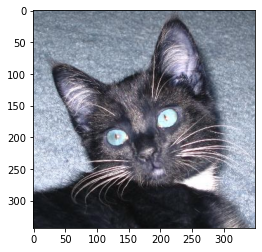

In [16]:
TEST_PATH = "C:/Users/awadh/Data Science/cnn-practice-master/data/test"
test_dogs_images = os.listdir(TEST_PATH + os.sep+ "cats/")

test_dog_img = test_dogs_images[1]
test_dog_img = cv2.imread(TEST_PATH + os.sep+ "cats/" + test_dog_img)

plt.figure()
plt.imshow(test_dog_img)

test_dog_img = cv2.resize(test_dog_img / 255, (IMAGE_SHAPE, IMAGE_SHAPE))
test_dog_img = test_dog_img.reshape(1, IMAGE_SHAPE, IMAGE_SHAPE, 3)

prediction = model.predict(test_dog_img)

if prediction[0][0] <= 0.5:
    print("Model : It's a CAT")
else:
    print("Model : It's a DOG")

In [17]:
History = model.fit(
    training_set_data, 
    epochs = 300, 
    validation_data = test_set_data, 
)

Epoch 1/300
1/1 [==============================] - 1s 702ms/step - loss: 9.7915e-04 - accuracy: 1.0000 - val_loss: 3.0453 - val_accuracy: 0.5500
Epoch 2/300
1/1 [==============================] - 1s 658ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 3.0098 - val_accuracy: 0.5500
Epoch 3/300
1/1 [==============================] - 1s 743ms/step - loss: 0.0202 - accuracy: 0.9750 - val_loss: 2.9650 - val_accuracy: 0.6500
Epoch 4/300
1/1 [==============================] - 1s 699ms/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 2.7480 - val_accuracy: 0.6500
Epoch 5/300
1/1 [==============================] - 1s 689ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 2.5743 - val_accuracy: 0.7000
Epoch 6/300
1/1 [==============================] - 1s 669ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 2.4184 - val_accuracy: 0.7000
Epoch 7/300
1/1 [==============================] - 1s 712ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 2.2808 - val_accuracy: 0.7000
Epoch 8/3

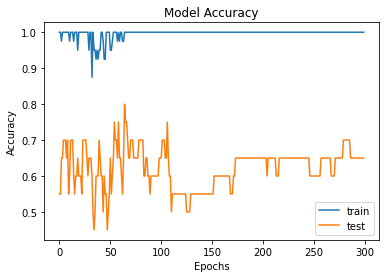

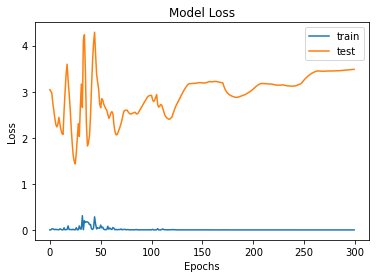

In [18]:
model_accuracy()
print()

model_loss()

1/1 [==============================] - 0s 31ms/step
Model : It's a DOG


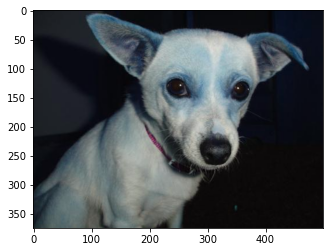

In [19]:
TEST_PATH = "C:/Users/awadh/Data Science/cnn-practice-master/data/test"
test_dogs_images = os.listdir(TEST_PATH + os.sep+ "dogs/")

test_dog_img = test_dogs_images[3]
test_dog_img = cv2.imread(TEST_PATH + os.sep+ "dogs/" + test_dog_img)

plt.figure()
plt.imshow(test_dog_img)

test_dog_img = cv2.resize(test_dog_img / 255, (IMAGE_SHAPE, IMAGE_SHAPE))
test_dog_img = test_dog_img.reshape(1, IMAGE_SHAPE, IMAGE_SHAPE, 3)

prediction = model.predict(test_dog_img)

if prediction[0][0] <= 0.5:
    print("Model : It's a CAT")
else:
    print("Model : It's a DOG")
    

1/1 [==============================] - 0s 7ms/step
Model : It's a DOG


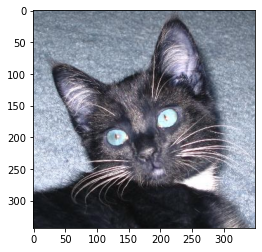

In [20]:

TEST_PATH = "C:/Users/awadh/Data Science/cnn-practice-master/data/test"
test_dogs_images = os.listdir(TEST_PATH + os.sep+ "cats/")

test_dog_img = test_dogs_images[1]
test_dog_img = cv2.imread(TEST_PATH + os.sep+ "cats/" + test_dog_img)

plt.figure()
plt.imshow(test_dog_img)

test_dog_img = cv2.resize(test_dog_img / 255, (IMAGE_SHAPE, IMAGE_SHAPE))
test_dog_img = test_dog_img.reshape(1, IMAGE_SHAPE, IMAGE_SHAPE, 3)

prediction = model.predict(test_dog_img)

if prediction[0][0] <= 0.5:
    print("Model : It's a CAT")
else:
    print("Model : It's a DOG")